In [1]:
import cv2
from pdf2image import convert_from_path
import numpy as np

In [2]:
# Defing the file path
path = r'data\sample2.pdf'

In [3]:
# Function to convert pdf to image
def pdf_to_images(pdf_path):
    return convert_from_path(pdf_path)

# Calling the function to convert PDF to image
images = pdf_to_images(path)

# converting the image to numpy array
image_np = np.array(images[0])
# converting teh image to a gray image
image_gray = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)

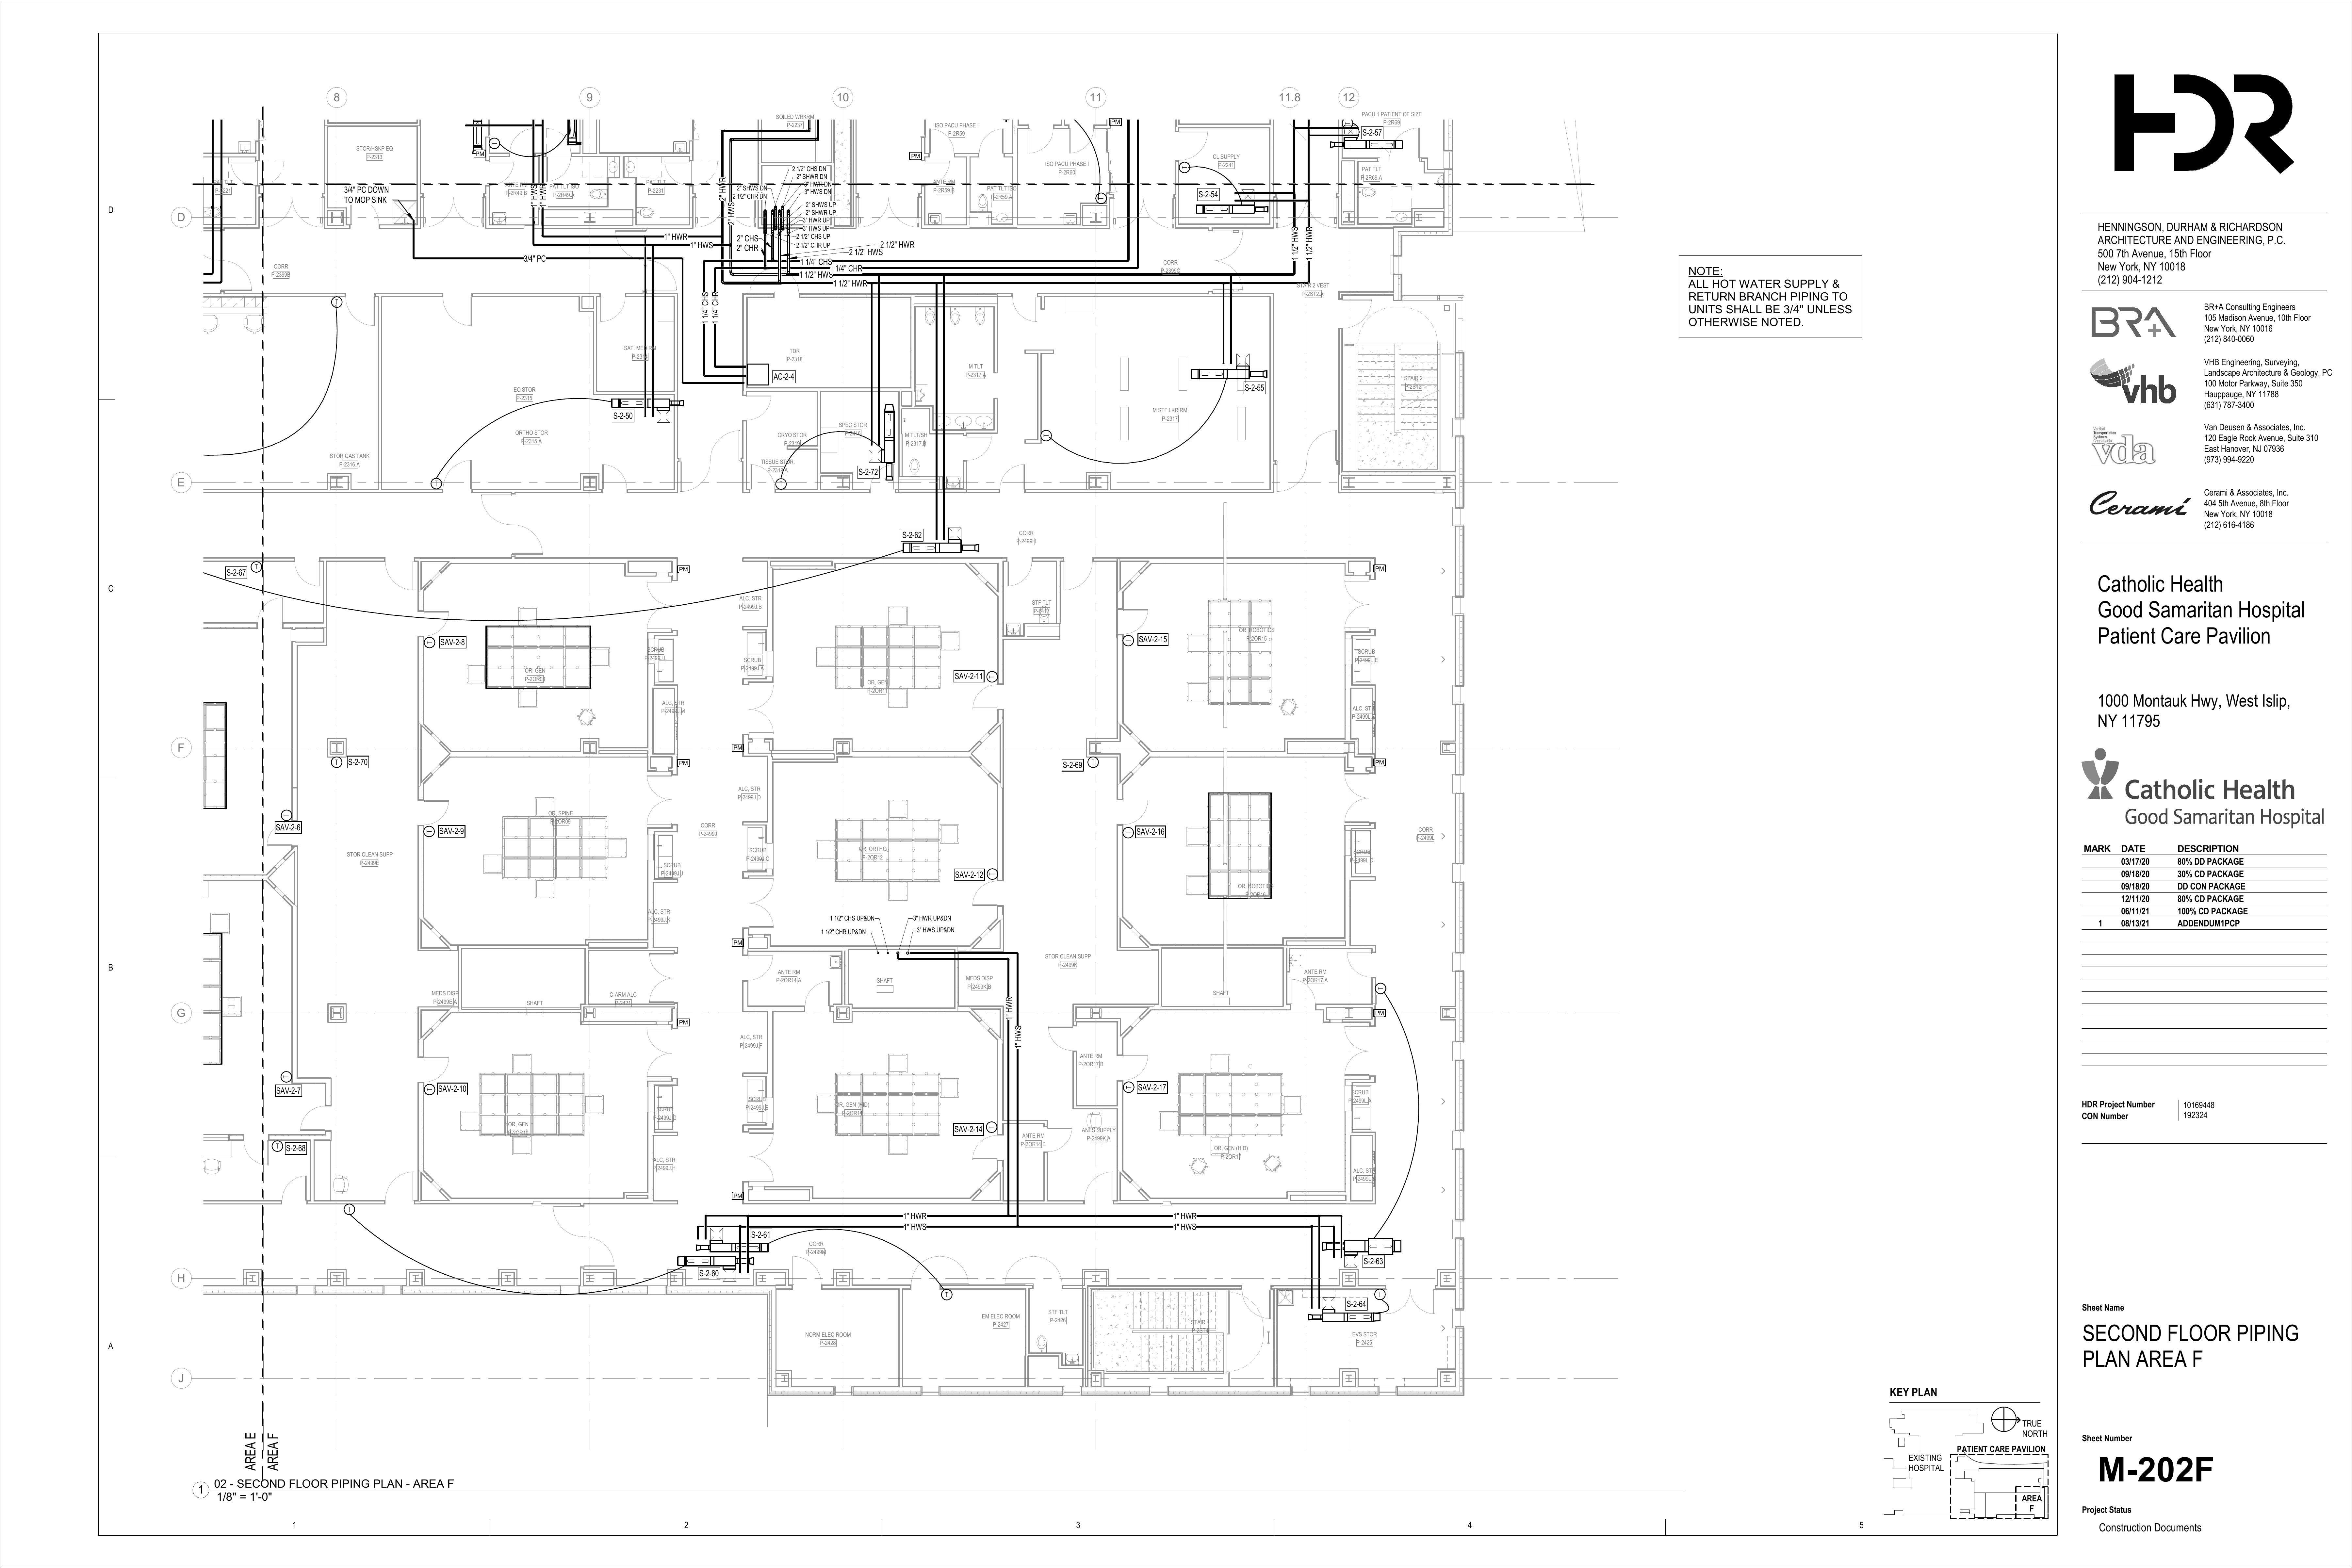

In [4]:
images[0]

In [4]:
# Fuction to display or save the image
def display_image(sample_image, image_resize=False, image_name=r'sample_image.png'):
    """
    This function is used to save or display the image
    i/p: image, image_name 
    o/p: key board entry "q" to close the window
         key board entry "s" to save the image
    """
    # resize image
    if image_resize == True:
        sample_image = cv2.resize(sample_image, (1500, 1000))
    else:
        sample_image = sample_image

    # Default image save path
    path = r'data/gray_image/'
    image_path = path + image_name
    
    cv2.imshow("converted image",sample_image)

    k = cv2.waitKey(0)

    if k == ord("q"):
        cv2.destroyAllWindows()
    elif k == ord("s"):
        cv2.imwrite(image_path,sample_image)
        cv2.destroyAllWindows()
    
    return None

In [5]:
# # calling image display function
# display_image(image_gray)

### Contours Detection

In [6]:
# # Countor Detection 
# ret, thresh = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# countor_img = cv2.drawContours(img1, contours, -1, (0, 0, 255), 3)

# display_image(countor_img)

In [7]:
# Inverting the gray image to have a better clarity on edge detection
inverted_gray = cv2.bitwise_not(image_gray)

In [8]:
# # display_image(image_gray, True)
# display_image(inverted_gray, True)

In [9]:
# kernel_sharpening = np.array([[1,1], 
#                               [1,1]])

# sharpened = cv2.filter2D(inverted_gray, -1, kernel_sharpening)

# display_image(sharpened, True)

### Adaptive Threshold

In [10]:
# adap_edages = cv2.adaptiveThreshold(
#     src = inverted_gray,
#     maxValue = 255,
#     adaptiveMethod = cv2.ADAPTIVE_THRESH_MEAN_C,
#     thresholdType = cv2.THRESH_BINARY_INV,
#     blockSize = 3,
#     C = 5
# )

# display_image(adap_edages, True)

In [11]:
# cv2.adaptiveThreshold?

### Edge Detection

In [12]:
edges = cv2.Canny(image=inverted_gray, threshold1=50, threshold2=800, 
                  apertureSize=3, L2gradient =False
                  )

# display_image(edges, True)

### Line Detection using HoughLines Transform

In [13]:
# test_image1 = image_gray.copy()
# test_image2 = image_gray.copy()

test_image1 = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR).copy()
test_image2 = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR).copy()

In [14]:
# lines = cv2.HoughLines(inverted_gray, 1, np.pi/180, 200)
    
# if lines is not None:
#     for line in lines:
#         rho, theta = line[0]
#         a = np.cos(theta)
#         b = np.sin(theta)
#         x0 = a * rho
#         y0 = b * rho
#         x1 = int(x0 + 1000 * (-b))
#         y1 = int(y0 + 1000 * (a))
#         x2 = int(x0 - 1000 * (-b))
#         y2 = int(y0 - 1000 * (a))
#         cv2.line(test_image1, (x1, y1), (x2, y2), (0, 0, 255), 2)

# # Display the result
# # resized_img = cv2.resize(test_image1, (1500, 1000))
# # displaying the image
# display_image(test_image1, True)
    

In [15]:
img = cv2.imread(r'data\gray_image\input_line_1.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# i_gray = cv2.bitwise_not(gray)

# Use morphological operations to emphasize thick lines
# kernel = np.ones((5, 5), np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilated = cv2.dilate(gray, kernel, iterations=1)
eroded = cv2.erode(dilated, kernel, iterations=1)

# Use the Canny edge detector
edges = cv2.Canny(eroded, 50, 150, apertureSize=3)

# Apply Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 200)

In [16]:
# lines = cv2.HoughLinesP(inverted_gray, rho=1, theta=np.pi/180, threshold=100, minLineLength=1000, maxLineGap=10)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
# resized_img1 = cv2.resize(test_image2, (1500, 1000))
# displaying the image
display_image(img, True)


### Mouse Call Back 

In [11]:
# Global variables
selected_line = None
lines = None
gray_bgr = None

In [12]:
def distance_to_line(point, line):
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    return abs((point[0] - x0) * b - (point[1] - y0) * a) / np.sqrt(a**2 + b**2)

In [16]:
def mouse_callback(event, x, y, flags, param):
    global selected_line, gray_bgr, lines

    if event == cv2.EVENT_LBUTTONDOWN:
        min_distance = float('inf')
        for line in lines:
            dist = distance_to_line((x, y), line)
            if dist < min_distance:
                min_distance = dist
                selected_line = line

        # Draw the selected line on the gray_bgr image
        if selected_line is not None:
            rho, theta = selected_line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(gray_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Highlight in green

        # Refresh the displayed image
        cv2.imshow('Select Line', gray_bgr)

In [17]:
def detect_dark_lines(image_path):
    global gray_bgr, lines

    # Read the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Convert the grayscale image back to BGR for colored line drawing
    gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    
    # Invert the grayscale image to detect dark lines on a light background
    inverted_gray = cv2.bitwise_not(gray)
    
    # Use the Canny edge detector
    edges = cv2.Canny(inverted_gray, 50, 150, apertureSize=3)
    
    # Use the Hough Line Transform to detect lines
    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

    cv2.namedWindow('Select Line')
    cv2.setMouseCallback('Select Line', mouse_callback)
    cv2.imshow('Select Line', gray_bgr)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Display the image with the selected line highlighted
    if selected_line is not None:
        display_image = gray_bgr.copy()
        rho, theta = selected_line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(display_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Highlight in green

        cv2.imshow('Selected Line', display_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [18]:
# Call the function
image_path = "data\gray_image\input_line_1.png"
detect_dark_lines(image_path)